# MLP MNIST
Hier werden das erste Mal im MNIST nun Algotihmen aus dem 
Multilayer Perceptron (MLP) for multi-class softmax classification:

In [17]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.models import model_from_json

In [18]:
# Hier die Hyperparamter
batch_size = 128
num_classes = 10
epochs = 20

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [20]:
x_train = x_train.reshape(60000, 784) # MLP benötigt InputVektor
x_test = x_test.reshape(10000, 784) # MLP benötigt InputVektor
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # skalieren
x_test /= 255 # Skalieren
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [22]:
# Prüfen ob bereits ein Model bereits trainiert und gespeichert ist, im Falle neu erstellen
# https://machinelearningmastery.com/save-load-keras-deep-learning-models/
# https://praxistipps.chip.de/python-check-if-file-exists-so-gehts_95704
from pathlib import Path
model = Path("./Data/model.json")
if model.is_file():
   # load json and create model
    json_file = open('./Data/model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    # load weights into new model
    model.load_weights("./Data/model.h5")
    print("Loaded model from disk")
else:
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax')) # hier der letzte Layer hat die Anzahl der möglichen klassen & die Softmax Aktivierung
    model.summary()

Loaded model from disk


In [23]:
#
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [24]:
# Ausführen des Modelles
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # show training progress during training Possible = 0,1,2
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0127 - accuracy: 0.9974 - val_loss: 0.1888 - val_accuracy: 0.9844
Epoch 2/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.0111 - accuracy: 0.9978 - val_loss: 0.1977 - val_accuracy: 0.9824
Epoch 3/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0129 - accuracy: 0.9973 - val_loss: 0.1927 - val_accuracy: 0.9845
Epoch 4/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.0113 - accuracy: 0.9977 - val_loss: 0.1825 - val_accuracy: 0.9841
Epoch 5/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.1846 - val_accuracy: 0.9832
Epoch 6/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0126 - accuracy: 0.9973 - val_loss: 0.2074 - val_accuracy: 0.9829
Epoch 7/20
60000/60000 [==============================] 

In [12]:
# Save trained Model to disk via JSON
model_json = model.to_json()
with open("./Data/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./Data/model.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2088796950228113
Test accuracy: 0.9842000007629395


In [14]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<Figure size 640x480 with 1 Axes>

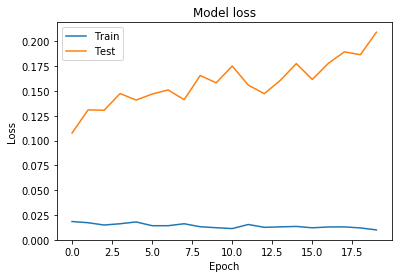

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

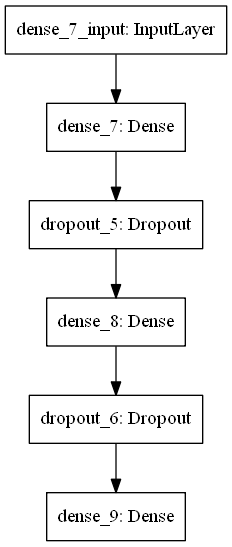

In [16]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB'
)